In [175]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read in SNOTEL locations (points) and the shapefile of each NRCS forecast point

gdf_points=pd.read_pickle('/Users/wcurrier/Documents/Data/SNOTEL/snotel/snotel_WUS_geometry.pkl')

gpkg_file_path = '/Users/wcurrier/Documents/Data/UCRB_NRCS_Forecast_Points_Shape_2.gpkg'
gdf_polygons=gpd.read_file(gpkg_file_path)

# Import state vector file using geopandas
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)

/Users/wcurrier/miniconda3/envs/py3/lib/python3.6/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


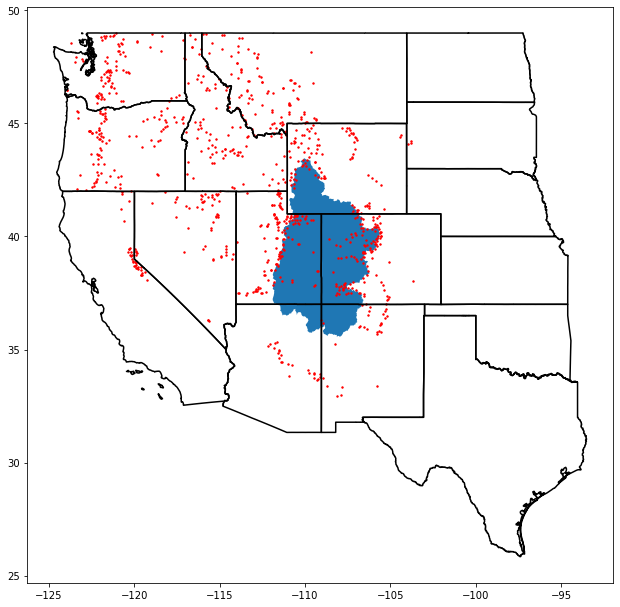

In [176]:

# Visualize all the data
ax=plt.axes((0,0,2,2))
states_gdf.cx[-120:-100,30:50].boundary.plot(ax=ax,color='black')
gdf_polygons[gdf_polygons['stationTriplet']=='09379900:AZ:USGS'].to_crs(epsg=4326).plot(ax=ax) # use Colorado at Cameo as an example
gdf_points.to_crs(epsg=4326).plot(ax=ax,color='red',markersize=2)

In [177]:
# Assume `gdf_points` is your GeoDataFrame with point geometries
# Assume `gdf_polygons` is your GeoDataFrame with polygon geometries

# Ensure both GeoDataFrames are in the same CRS
if gdf_points.crs != gdf_polygons.crs:
    gdf_points = gdf_points.to_crs(gdf_polygons.crs)

    # Perform spatial join to find points within polygons
gdf_polygon=gdf_polygons[gdf_polygons['stationTriplet']=='09379900:AZ:USGS']
gdf_within = gdf_points[gdf_points.geometry.apply(lambda point: gdf_polygon.geometry.apply(lambda polygon: point.within(polygon)).any())]
gdf_within

,code,name,network,elevation_m,site_property,geometry
SNOTEL:1030_CO_SNTL,1030_CO_SNTL,Arapaho Ridge,SNOTEL,3340.607910,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-872469.427 1974001.485)
SNOTEL:305_CO_SNTL,305_CO_SNTL,Arrow,SNOTEL,2950.464111,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-825506.617 1919940.464)
SNOTEL:8082_UT_SNTL,8082_UT_SNTL,Atwood Lake,SNOTEL,3304.031982,"{'county': 'Duchesne', 'state': 'Utah', 'site_...",POINT (-1191846.927 2058862.403)
SNOTEL:317_WY_SNTL,317_WY_SNTL,Battle Mountain,SNOTEL,2267.711914,"{'county': 'Carbon', 'state': 'Wyoming', 'site...",POINT (-937169.722 2060667.252)
SNOTEL:1061_CO_SNTL,1061_CO_SNTL,Bear River,SNOTEL,2767.583984,"{'county': 'Routt', 'state': 'Colorado', 'site...",POINT (-928777.714 1947731.286)
...,...,...,...,...,...,...
SNOTEL:859_WY_SNTL,859_WY_SNTL,Whiskey Park,SNOTEL,2727.959961,"{'county': 'Carbon', 'state': 'Wyoming', 'site...",POINT (-908211.758 2051496.956)
SNOTEL:864_UT_SNTL,864_UT_SNTL,White River #1,SNOTEL,2633.776855,"{'county': 'Wasatch', 'state': 'Utah', 'site_c...",POINT (-1263734.777 1982863.491)
SNOTEL:869_CO_SNTL,869_CO_SNTL,Willow Creek Pass,SNOTEL,2907.791992,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-848481.249 1970962.277)
SNOTEL:874_CO_SNTL,874_CO_SNTL,Wolf Creek Summit,SNOTEL,3352.800049,"{'county': 'Mineral', 'state': 'Colorado', 'si...",POINT (-944144.015 1658172.210)


In [178]:
dfSNTL

,SNOTEL:301_CA_SNTL,SNOTEL:907_UT_SNTL,SNOTEL:916_MT_SNTL,SNOTEL:908_WA_SNTL,SNOTEL:302_OR_SNTL,SNOTEL:1000_OR_SNTL,SNOTEL:303_CO_SNTL,SNOTEL:1030_CO_SNTL,SNOTEL:304_OR_SNTL,SNOTEL:305_CO_SNTL,...,SNOTEL:872_WY_SNTL,SNOTEL:873_OR_SNTL,SNOTEL:874_CO_SNTL,SNOTEL:875_WY_SNTL,SNOTEL:876_MT_SNTL,SNOTEL:877_AZ_SNTL,SNOTEL:1228_UT_SNTL,SNOTEL:1197_UT_SNTL,SNOTEL:878_WY_SNTL,SNOTEL:1033_CO_SNTL
datetime,,,,,,,,,,,,,,,,,,,,,
1963-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-10-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-10-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-10-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-10-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-27 00:00:00+00:00,14.5,11.2,22.6,59.6,27.2,56.4,1.1,27.8,23.1,NaN,...,11.1,17.3,47.0,12.9,8.4,0.0,14.1,6.9,15.9,31.7
2023-04-28 00:00:00+00:00,13.2,9.3,22.9,59.5,26.8,55.8,1.0,28.5,22.0,NaN,...,11.3,16.4,44.7,12.7,8.2,0.0,13.1,6.0,15.6,30.8
2023-04-29 00:00:00+00:00,11.6,8.2,23.0,58.8,26.7,54.8,1.6,28.4,20.6,NaN,...,11.2,15.5,43.7,12.4,7.6,0.0,12.4,5.0,15.4,30.8


In [186]:
dfSNTL=pd.read_pickle('/Users/wcurrier/Documents/Data/SNOTEL/snotel/snotel_WUS_WTEQ_D_20230501.pkl')

begining_year='1993-01-01'
new_df = pd.DataFrame()
for snotelSite in gdf_within.index:
    try:
        tf=np.isnan(dfSNTL[snotelSite][begining_year:][0]) # is the first value a NaN
        tf2=np.isnan(dfSNTL[snotelSite]['2023-04-01']) # is the first value a NaN

        # if tf is False then we have data by 1990 at the SNOTEL site
        if tf == False and tf2 == False:
            new_df = new_df.append(dfSNTL[snotelSite][begining_year:])
    except:
        print('failed on '+snotelSite)
        
new_df_t=new_df.transpose()
# Filter for April 1 each year
april_1_data = new_df_t[new_df_t.index.strftime('%m-%d') == '04-01']

# Calculate the mean across all columns for each April 1
april_1_mean = april_1_data.mean(axis=1)
april_1_POM = april_1_mean/april_1_mean.median()
# april_1_POM.plot() 
print(len(new_df_t.columns))
new_df_t


failed on SNOTEL:8082_UT_SNTL
failed on SNOTEL:247_CO_SNTL
failed on SNOTEL:248_CO_SNTL
failed on SNOTEL:261_UT_SNTL
failed on SNOTEL:249_CO_SNTL
failed on SNOTEL:250_CO_SNTL
93


,SNOTEL:317_WY_SNTL,SNOTEL:335_CO_SNTL,SNOTEL:342_WY_SNTL,SNOTEL:345_CO_SNTL,SNOTEL:348_UT_SNTL,SNOTEL:353_WY_SNTL,SNOTEL:368_UT_SNTL,SNOTEL:371_UT_SNTL,SNOTEL:378_CO_SNTL,SNOTEL:380_CO_SNTL,...,SNOTEL:827_CO_SNTL,SNOTEL:831_WY_SNTL,SNOTEL:833_UT_SNTL,SNOTEL:840_CO_SNTL,SNOTEL:842_CO_SNTL,SNOTEL:843_CO_SNTL,SNOTEL:859_WY_SNTL,SNOTEL:864_UT_SNTL,SNOTEL:869_CO_SNTL,SNOTEL:874_CO_SNTL
1993-01-01 00:00:00+00:00,4.8,6.4,6.3,13.5,2.2,8.0,7.7,6.7,6.9,6.4,...,7.7,7.7,4.8,15.1,8.2,10.0,10.3,6.4,6.9,14.3
1993-01-02 00:00:00+00:00,4.8,6.3,6.3,13.7,2.2,8.2,7.8,6.7,7.2,6.4,...,7.7,7.9,5.0,15.4,8.2,10.2,10.4,6.4,7.0,14.5
1993-01-03 00:00:00+00:00,5.1,6.0,6.9,14.6,2.4,8.2,8.5,7.2,7.5,6.5,...,8.1,7.9,5.5,16.9,8.3,10.5,10.8,7.1,7.0,15.5
1993-01-04 00:00:00+00:00,5.1,6.3,6.9,14.6,2.4,8.2,8.5,7.4,7.6,6.5,...,8.1,7.9,5.5,17.2,8.3,10.5,10.8,7.3,7.1,15.7
1993-01-05 00:00:00+00:00,5.1,6.2,6.9,14.9,2.5,8.3,8.5,7.4,7.6,6.6,...,8.5,7.9,5.5,17.5,8.4,10.5,10.8,7.3,7.3,15.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-27 00:00:00+00:00,12.9,20.3,16.6,43.6,11.9,28.5,27.3,25.3,20.6,19.2,...,7.5,27.3,19.7,44.8,19.8,23.3,39.0,17.9,19.9,47.0
2023-04-28 00:00:00+00:00,11.8,20.7,16.4,43.5,11.6,27.7,27.3,24.7,20.4,18.7,...,7.7,27.2,19.0,44.2,19.5,22.8,39.4,17.0,20.4,44.7
2023-04-29 00:00:00+00:00,11.0,20.7,16.3,43.5,11.1,28.1,27.5,24.0,20.1,18.0,...,7.3,26.8,18.5,42.7,19.1,22.3,39.4,16.6,20.4,43.7
2023-04-30 00:00:00+00:00,10.3,21.0,15.9,43.9,9.8,27.9,27.5,23.6,19.2,17.5,...,6.8,26.1,17.5,42.2,18.2,21.2,39.2,15.1,20.1,42.4


In [187]:
gdf_within['ratio'] = None
gdf_within['slopes'] = None
gdf_within['p_value'] = None
gdf_within['intercept'] = None

for site in new_df_t.columns:
    try:
        df=new_df_t[site]

        # Assuming your dataframe is named 'df' and has a datetime index with an SWE column
        # Extract April 1 SWE values for each year
        april_1_swe = df.loc[(df.index.month == 4) & (df.index.day == 1)].copy()

        # Check if multiple values exist per year (e.g., different time zones or duplicates)
        april_1_swe = april_1_swe.groupby(april_1_swe.index.year).first()  # Ensure only one value per year
        
        # Step 1: Find the index where the first non-NaN value occurs
        first_non_nan_index = np.where(~np.isnan(april_1_swe))[0][0]
#         print(f"First non-NaN value index: {first_non_nan_index}")

        # Step 2: Create a new array without the NaN values starting from that index
        april_1_swe_non_nan = april_1_swe[first_non_nan_index:]
#         april_1_swe_non_nan = april_1_swe_non_nan[april_1_swe_non_nan.index > 1994]
        
        # Step 3: Check if all values in the new array are greater than 30
        all_greater_than_30 = len(april_1_swe_non_nan) >= 30
#         print(f"Total values after the first non-NaN are > 30: {all_greater_than_30}")

        if all_greater_than_30 == False:
            xyz=20
#             print('less than 30 - skipping')
        else:

            # Step 2: Perform the Mann-Kendall test
            mk_result = mk.original_test(april_1_swe_non_nan)

            # Step 3: Perform Theil-Sen slope estimator
            years = april_1_swe_non_nan.index
            swe_values = april_1_swe_non_nan.values

            # Calculate Theil-Sen slope and intercept
            slope, intercept, _, _ = theilslopes(swe_values, years)

            first_val = (intercept + slope * years)[0]
            last_val  = (intercept + slope * years)[-1]
            ratio=((last_val-first_val)/first_val)*100

            gdf_within.loc[site, 'slopes'] = slope
            gdf_within.loc[site, 'intercept'] = intercept
            gdf_within.loc[site, 'p_value'] = mk_result.p
            gdf_within.loc[site, 'ratio'] = ratio

    except:
        xyx=30
        print('failed')
        
gdf_within['slopes_scaled']=(gdf_within['slopes']*10).astype('float32')
gdf_within['slopes']=(gdf_within['slopes']).astype('float32')
gdf_within['ratio']=(gdf_within['ratio']).astype('float32')
gdf_within['p_value']=(gdf_within['p_value']).astype('float32')

# Subset where p-value is less than 0.05
gdf_significant = gdf_within[gdf_within['p_value'] < 0.05]

# Subset where p-value is greater than or equal to 0.05
gdf_non_significant = gdf_within[gdf_within['p_value'] >= 0.05]
gdf_non_significant = gdf_non_significant[gdf_non_significant['slopes'] >= -9999]

total_num_sites=(len(gdf_significant)+len(gdf_non_significant))
print(str(total_num_sites)+' total sites')
print(str(np.round((len(gdf_significant)/total_num_sites)*100,decimals=1))+' are signficant')
print(str(np.round((len(gdf_significant[gdf_significant['slopes']<0])/total_num_sites)*100,decimals=1))+' are signficant and decreasing')
print(str(np.round((len(gdf_significant[gdf_significant['slopes']>0])/total_num_sites)*100,decimals=1))+' are signficant and increasing')

print(str(np.round((len(gdf_within[gdf_within['slopes']<0])/total_num_sites)*100,decimals=1))+' are decreasing')
print(str(np.round((len(gdf_within[gdf_within['slopes']>0])/total_num_sites)*100,decimals=1))+' are increasing')

gdf_non_significant = gdf_non_significant.to_crs(epsg=4326)
gdf_significant     = gdf_significant.to_crs(epsg=4326)
gdf_within          = gdf_within.to_crs(epsg=4326)

93 total sites
1.1 are signficant
1.1 are signficant and decreasing
0.0 are signficant and increasing
75.3 are decreasing
19.4 are increasing


In [181]:
gdf_within

,code,name,network,elevation_m,site_property,geometry,ratio,slopes,p_value,intercept,slopes_scaled
SNOTEL:1030_CO_SNTL,1030_CO_SNTL,Arapaho Ridge,SNOTEL,3340.607910,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-872469.427 1974001.485),NaN,NaN,NaN,None,NaN
SNOTEL:305_CO_SNTL,305_CO_SNTL,Arrow,SNOTEL,2950.464111,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-825506.617 1919940.464),NaN,NaN,NaN,None,NaN
SNOTEL:8082_UT_SNTL,8082_UT_SNTL,Atwood Lake,SNOTEL,3304.031982,"{'county': 'Duchesne', 'state': 'Utah', 'site_...",POINT (-1191846.927 2058862.403),NaN,NaN,NaN,None,NaN
SNOTEL:317_WY_SNTL,317_WY_SNTL,Battle Mountain,SNOTEL,2267.711914,"{'county': 'Carbon', 'state': 'Wyoming', 'site...",POINT (-937169.722 2060667.252),NaN,NaN,NaN,None,NaN
SNOTEL:1061_CO_SNTL,1061_CO_SNTL,Bear River,SNOTEL,2767.583984,"{'county': 'Routt', 'state': 'Colorado', 'site...",POINT (-928777.714 1947731.286),NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
SNOTEL:859_WY_SNTL,859_WY_SNTL,Whiskey Park,SNOTEL,2727.959961,"{'county': 'Carbon', 'state': 'Wyoming', 'site...",POINT (-908211.758 2051496.956),NaN,NaN,NaN,None,NaN
SNOTEL:864_UT_SNTL,864_UT_SNTL,White River #1,SNOTEL,2633.776855,"{'county': 'Wasatch', 'state': 'Utah', 'site_c...",POINT (-1263734.777 1982863.491),NaN,NaN,NaN,None,NaN
SNOTEL:869_CO_SNTL,869_CO_SNTL,Willow Creek Pass,SNOTEL,2907.791992,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-848481.249 1970962.277),NaN,NaN,NaN,None,NaN
SNOTEL:874_CO_SNTL,874_CO_SNTL,Wolf Creek Summit,SNOTEL,3352.800049,"{'county': 'Mineral', 'state': 'Colorado', 'si...",POINT (-944144.015 1658172.210),NaN,NaN,NaN,None,NaN


In [184]:
import xarray as xr
states_gdf = gpd.read_file('http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json')
crb = gpd.read_file('/Users/wcurrier/Documents/Data/crb_segments/b9522000.shp')

ds=xr.open_dataset('/Users/wcurrier/Downloads/Currier_et_al_2023_data/VIC/crb.params.w_Masks.CONUS_MX.MOD_IGBP.mode.2000_2016.nc')
# Define the number of contour levels and corresponding colors
colors = ['black', '#4d4d4d', '#808080', '#b3b3b3', '#d9d9d9', '#f2f2f2']  # Custom grayscale colors


Text(0.5, 1.0, 'SNOTEL changes in SWE from 1980-2024\n Regardless of Statistical Significance')

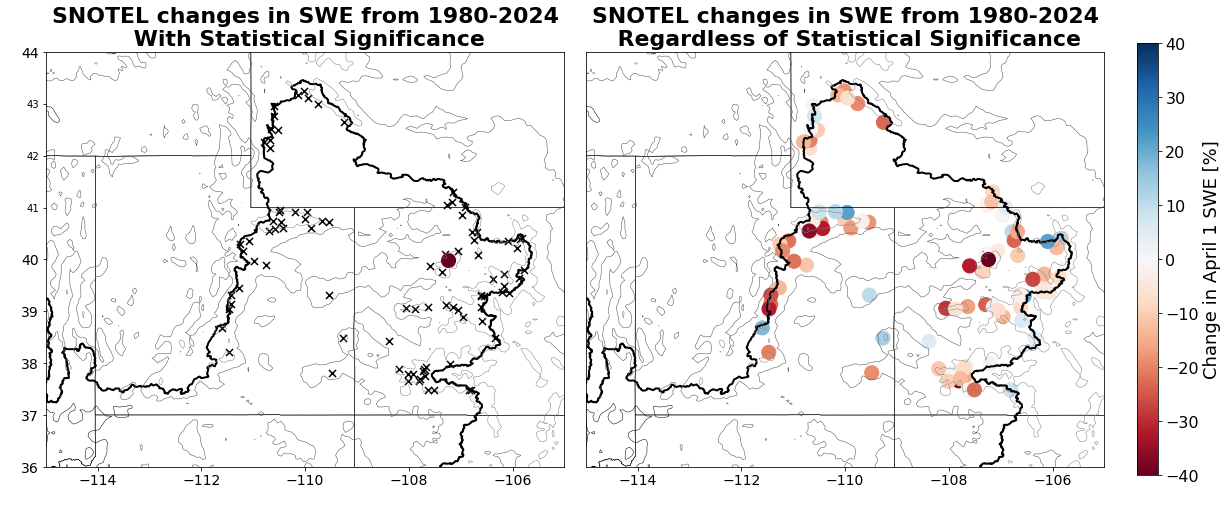

In [188]:
# co_SNTL.plot(column='slopes', cmap='viridis')
import matplotlib.pyplot as plt
import matplotlib as mpl

ax = plt.axes((0,0.03,1.5,1.44))

gdf_non_significant.plot(ax=ax,legend=False, color='black',markersize=50,marker='x')
gdf_plot = gdf_significant.plot(ax=ax,column='ratio',legend=False, cmap='RdBu',markersize=200,vmin=-40,vmax=40)

states_gdf.boundary.plot(linewidth=0.5,color='black',ax=ax)
crb.boundary.plot(linewidth=2,color='black',ax=ax)
ds['elev'].plot.contour(ax=ax,
    levels=[1000, 2000, 3000],          # Number of levels in the contour
    colors=colors,          # Apply custom colors for each contour level
    linewidths=.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([-115,-105])
plt.ylim([36,44])
plt.ylabel(' ')
plt.xlabel(' ')
plt.title('SNOTEL changes in SWE from 1980-2024\n With Statistical Significance',fontsize=22,fontweight='bold')



ax2 = plt.axes((1.4,0,1.5,1.5))
gdf_plot_2 = gdf_within.plot(column='ratio', ax=ax2,legend=True, cmap='RdBu',markersize=200,vmin=-40,vmax=40)
states_gdf.boundary.plot(linewidth=0.5,color='black',ax=ax2)
crb.boundary.plot(linewidth=2,color='black',ax=ax2)
ds['elev'].plot.contour(ax=ax2,
    levels=[1000, 2000, 3000],          # Number of levels in the contour
    colors=colors,          # Apply custom colors for each contour level
    linewidths=.5)
colorbar2 = gdf_plot_2.get_figure().get_axes()[2]  # Access colorbar from the second axis created by GeoPandas
colorbar2.set_ylabel('Change in April 1 SWE [%]', fontsize=18)  # Change the label
colorbar2.tick_params(labelsize=16)  # Adjust tick label size
plt.xticks(fontsize=14)
plt.yticks(ticks=[],fontsize=14)
plt.xlim([-115,-105])
plt.ylim([36,44])
plt.ylabel(' ')
plt.xlabel(' ')
plt.title('SNOTEL changes in SWE from 1980-2024\n Regardless of Statistical Significance',fontsize=22,fontweight='bold')


In [129]:
gdf_plot_2.get_figure().get_axes()

(36.0, 44.0)

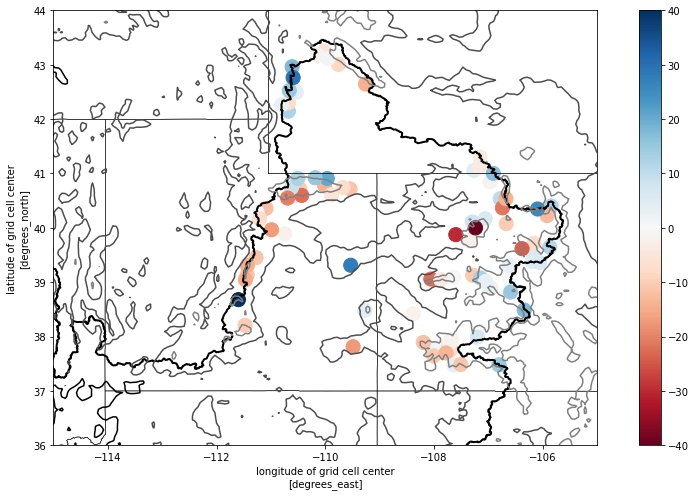

In [97]:
# co_SNTL.plot(column='slopes', cmap='viridis')
import matplotlib.pyplot as plt
# import matplotlib as mpl

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
cmap = 'RdBu'  # Choose your colormap

# gdf_non_significant.plot(ax=ax,legend=False, color='black',markersize=50,marker='x')
gdf_within.plot(column='ratio', ax=ax,legend=True, cmap='RdBu',markersize=200,vmin=-40,vmax=40)

# # Create a colorbar
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=-1, vmax=1))
# sm.set_array([])  # Only needed for older versions of matplotlib
# cbar = fig.colorbar(sm, ax=ax)
# cbar.set_label('Change in SWE %/decade')


states_gdf.boundary.plot(linewidth=0.5,color='black',ax=ax)
crb.boundary.plot(linewidth=2,color='black',ax=ax)
# Create a contour plot with custom colors
ds['elev'].plot.contour(
    levels=[1000, 2000, 3000],          # Number of levels in the contour
    colors=colors,          # Apply custom colors for each contour level
    linewidths=1.5)
plt.xlim([-115,-105])
plt.ylim([36,44])


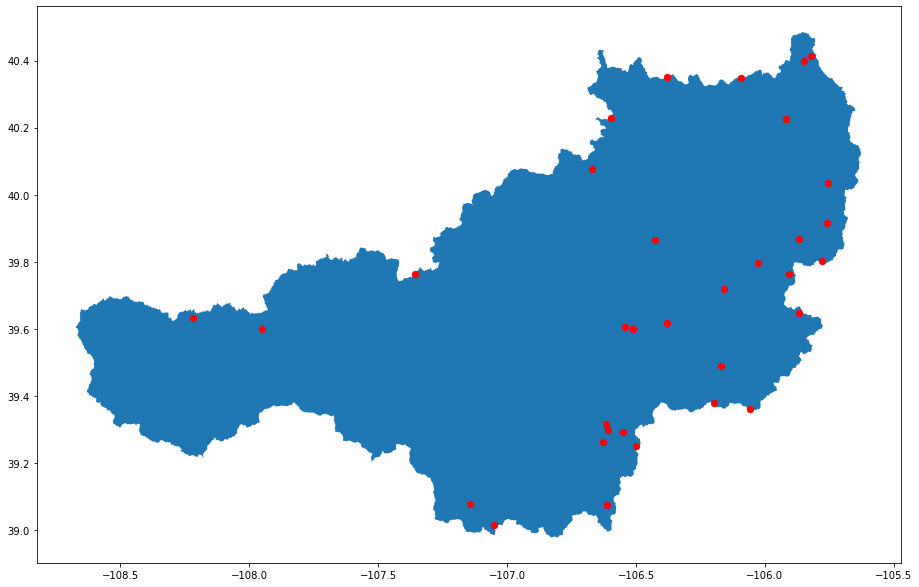

In [4]:
ax=plt.axes((0,0,2,2))

gdf_polygons[gdf_polygons['stationTriplet']=='09095500:CO:USGS'].to_crs(epsg=4326).plot(ax=ax)
gdf_within.to_crs(epsg=4326).plot(ax=ax,color='red',markersize=40)

In [5]:
len(gdf_within)

33